# Classification. Linear models and KNN

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
PATH = "./data/"

## Part 2: Porto Seguro’s Safe Driver Prediction

Let's build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.
Read the detailed description and download the dataset https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data. Put the data into *./data/porto/*.

In [4]:
insurance_data = pd.read_csv(os.path.join(PATH, 'porto', 'train.csv')).set_index('id')

In [5]:
insurance_data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


Let's skip EDA for now. We'll use SGDClassifier and build a simple baseline: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html.
Note that loss='log' gives logistic regression.

In [5]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])

In [6]:
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
clf = pipeline.fit(X_train, y_train)

We'll calculate the model accuracy:

In [10]:
accuracy_score(y_true=y_valid, y_pred=clf.predict(X_valid))

0.9631224658945812

Wow! Our model gets ~0.963 accuracy! But is it really good?...

Let's plot the confusion matrix and analyze the errors.

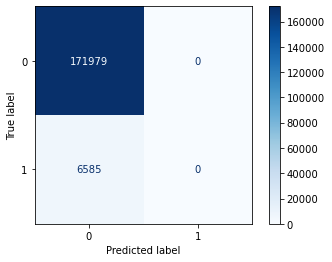

In [11]:
disp = plot_confusion_matrix(clf, X_valid, y_valid,
                             cmap=plt.cm.Blues,
                             normalize=None)

Well, it turns out that our model is completely useless. Let's calculate some basic statistics:

In [12]:
insurance_data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you see, there are less than 4% of positive examples, so we have to deal with a highly imbalanced dataset.

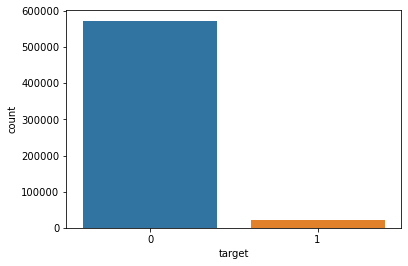

In [13]:
sns.countplot(x='target', data=insurance_data)
plt.show()

Accuracy is not informative here and the Normalized Gini Coefficient will be used instead: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/evaluation.

In [6]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float) 
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  #ОТСОРТИРОВАЛИ ПО ПРЕДСКАЗАННЫМ ЗНАЧЕНИЯМ
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

**(1.5 points)** Prove that the **Normalized Gini Coefficient** is equivalent to **2 x AUC - 1** :

### См. proof_photo1,..., proof_photo2

**(0.5 points)** By the way, what other metrics could you suggest for this problem?

Тк хотим, чтобы в метрике отображался результат **правильно предсказанных True значений, т.е. TP**, то нас заинтересуют такие метрики, как recall=TPR=TP/(TP+FN) или Precision=TP/(TP+FP). f1 - гармоническое среднее precision & recall.

In [15]:
y_pred = clf.predict_proba(X_valid)[:, 1]

In [ ]:
#y_pred определен в следующей ячейке
print(f"recall(treshold=0.125)={sklearn.metrics.recall_score(y_valid, y_pred>=0.125)}");
print(f"recall(treshold=0.0125)={sklearn.metrics.recall_score(y_valid, y_pred>=0.0125)} #СЛИШКОМ ВЫСОКИЙ РЕЙТИНГ, ЕСЛИ ПРЕДСКАЗЫВАТЬ ВСЕГДА 1");
print(f"precision(treshold=0.0125)={sklearn.metrics.precision_score(y_valid, y_pred>=0.0125)}");
print(f"precision(treshold=0.125)={sklearn.metrics.precision_score(y_valid, y_pred>=0.125)}");
print(f"precision(treshold=0.25)={sklearn.metrics.precision_score(y_valid, y_pred>=0.25)}");
print(f"f1(treshold=0.125)={sklearn.metrics.f1_score(y_valid, y_pred>=0.0125)}");
print(f"f1(treshold=0.25)={sklearn.metrics.f1_score(y_valid, y_pred>=0.25)}");

print(f"FPR(treshold=0.25)=inf - DIVISION BY ZERRO ERROR")#{((y_valid==1) & (y_pred>=0.125)).sum()/(((y_valid==0) & (y_pred>=0.125)).sum() +((y_valid==0) & (y_pred>=0.125)).sum() )}")
print(f"FPR(treshold=0.125)={((y_valid==1) & (y_pred>=0.125)).sum()/(((y_valid==0) & (y_pred>=0.125)).sum() +((y_valid==0) & (y_pred>=0.125)).sum() )}")
print(f"FPR(treshold=0.0125)={((y_valid==1) & (y_pred>=0.0125)).sum()/(((y_valid==0) & (y_pred>=0.0125)).sum() +((y_valid==0) & (y_pred>=0.0125)).sum() )}")

Let's calculate the Normalized Gini Coefficient:

In [17]:
#y_pred = clf.predict_proba(X_valid)[:, 1]
y_valid

id
642026     0
297043     0
140591     0
1354540    0
873173     0
          ..
698149     0
1047254    0
344168     0
761795     0
450195     0
Name: target, Length: 178564, dtype: int64

In [18]:
gini_normalized(y_valid, y_pred)

0.2558723581569817

**(0.5 points + Y bonus points)** Try different approaches: oversampling / undersampling, careful feature analysis and feature engineering, etc., to get a reasonable pipeline and improve the model quality. Use cross-validation for model evaluation.

Select the best model, load the test set and make the predictions. Submit them to kaggle.
Y bonus points will be calculated as $\frac{round(200 * \max(score - 0.253, 0))}{2}$, where *score* is your kaggle leaderboard score.

Note: do not use any classification models which have not been covered in the lessons yet.

ТК датасет несбалансированный, причем в сторону 0-класса, сгенерируем больше похожих на имеющиеся из 1-класса  или, тк в 0-классе примеров крайне много, сотни тысяч, можно рандомно выкидывать похожие примеры из 0-класса.
Для этого воспользуемся библиотекой imbalanced-learn

In [19]:
#pip install -U imbalanced_learn

In [7]:
#МОЖНО РАНДОМНО УДАЛЯТЬ ПРИМЕРЫ ИЗ КЛАССА 0
#ИЛИ РАНДОМНО ГЕНЕРИРОВАТЬ ПРИМЕРЫ В КЛАСС 1
# https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
data = insurance_data.copy()

In [21]:
#UNDERSAMPLING (вырезаем похожих? представителей 0-класса)
Xr = X.copy() #'r' for resampled
yr = y.copy()

steps = [('under', RandomUnderSampler()),
        ('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))]

pipeline = imblearn.pipeline.Pipeline(steps=steps)
Xr_train, Xr_valid, yr_train, yr_valid = train_test_split(Xr, yr, test_size=0.3, random_state=42)
clf = pipeline.fit(Xr_train, yr_train)
yr_pred = clf.predict_proba(Xr_valid)[:, 1]
gini_normalized(yr_valid, yr_pred)

0.24294241694355465

In [22]:
#OVERSAMPLING
Xr = X.copy() #'r' for resampled
yr = y.copy()

# undersample = RandomUnderSampler(sampling_strategy = 'majority')
steps = [('over', RandomOverSampler()),
        ('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=42))]

pipeline = imblearn.pipeline.Pipeline(steps=steps)

#cv = RepeatedStratifiedKFold(n_splits =10, n_repeats = 3, random_state = 42)
#scores = cross_val_score(pipeline, Xr, yr, scoring='roc_auc', cv=cv, n_jobs=-1)
#score = mean(score)

Xr_train, Xr_valid, yr_train, yr_valid = train_test_split(Xr, yr, test_size=0.3, random_state=42)

clf = pipeline.fit(Xr_train, yr_train)

yr_pred = clf.predict_proba(Xr_valid)[:, 1]
gini_normalized(yr_valid, yr_pred)

0.2596684971525396

### Проверим модель на тестовых данных

In [8]:
test_data = pd.read_csv(os.path.join(PATH, 'porto', 'test.csv')).set_index('id')

In [24]:
X_test = test_data
predicted_test_data = test_data.copy()
predicted_test_data['target'] = clf.predict_proba(X_test)[:, 1]
predicted_test_data[['target']].to_csv('porto_my_predictions.csv', index=True)
predicted_test_data[['target']]

,target
id,
0,0.458640
1,0.483788
2,0.444586
3,0.333150
4,0.557901
...,...
1488022,0.731792
1488023,0.565440
1488024,0.522142


<AxesSubplot:>

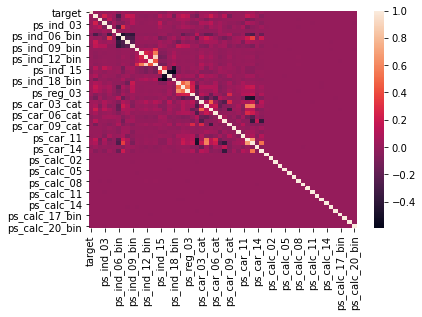

In [25]:
sns.heatmap(insurance_data.corr())

In [19]:
insurance_data.corr().target.abs().sort_values(ascending=True).head()

ps_calc_04        0.000033
ps_calc_06        0.000082
ps_calc_07        0.000103
ps_calc_17_bin    0.000170
ps_calc_11        0.000371
Name: target, dtype: float64

видно, что все признаки почти перпендикулярны target (если сортировать descending=False)

In [27]:
insurance_data.corr().abs().unstack().drop_duplicates().sort_values(ascending=False).head()

target         target       1.000000
ps_ind_12_bin  ps_ind_14    0.890127
ps_car_12      ps_car_13    0.671720
ps_reg_01      ps_reg_03    0.637035
ps_car_04_cat  ps_car_13    0.595173
dtype: float64

Один из признаков можно выкинуть - ps_ind_14, получим приращение. Выкинем 5 признаков с крайне низкой корреляцией с таргетом

In [10]:
features = list(set(insurance_data.columns)-{"ps_ind_14","target"}-set(insurance_data.corr().target.abs().sort_values(ascending=True).head(3).index))
#print(features)
Xr = X[features].copy() #'r' for resampled
yr = y.copy()

#OVERSAMPLING
numeric_features = [column for column in Xr if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in Xr if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# undersample = RandomUnderSampler(sampling_strategy = 'majority')
steps = [('over', RandomOverSampler()),
        ('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=42))]

pipeline = imblearn.pipeline.Pipeline(steps=steps)

#cv = RepeatedStratifiedKFold(n_splits =10, n_repeats = 3, random_state = 42)
#scores = cross_val_score(pipeline, Xr, yr, scoring='roc_auc', cv=cv, n_jobs=-1)
#score = mean(score)

Xr_train, Xr_valid, yr_train, yr_valid = train_test_split(Xr, yr, test_size=0.3, random_state=42)

clf = pipeline.fit(Xr_train, yr_train)

yr_pred = clf.predict_proba(Xr_valid)[:, 1]
gini_normalized(yr_valid, yr_pred)

0.26108482730496535

Уберем признаки с низкой дисперсией

In [ ]:
#OVERSAMPLING
#Xr = X.copy() #'r' for resampled
#yr = y.copy()
import sklearn.feature_selection
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
# undersample = RandomUnderSampler(sampling_strategy = 'majority')
steps = [('over', RandomOverSampler()),
        ('preprocessor', preprocessor),
         ('selector', sklearn.feature_selection.VarianceThreshold(threshold=0.005)),
    #   ('feature_selection', sklearn.feature_selection.SelectFromModel(svm.LinearSVC(penalty='l1', dual=False))),
                           ('classifier',RandomForestClassifier())]
                            #SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=42))]

pipeline = imblearn.pipeline.Pipeline(steps=steps)

Xr_train, Xr_valid, yr_train, yr_valid = train_test_split(Xr, yr, test_size=0.3, random_state=42)

clf = pipeline.fit(Xr_train, yr_train)

yr_pred = clf.predict_proba(Xr_valid)[:, 1]
gini_normalized(yr_valid, yr_pred)

In [16]:
X_test = test_data[features]
predicted_test_data = test_data.copy()
predicted_test_data['target'] = clf.predict_proba(X_test)[:, 1]
predicted_test_data[['target']].to_csv('porto_my_predictions.csv', index=True)
predicted_test_data[['target']]

,target
id,
0,0.471635
1,0.465657
2,0.442040
3,0.343139
4,0.543425
...,...
1488022,0.711890
1488023,0.569269
1488024,0.527895
